- 모델 : CNN, 합성곱, 폴링, 평탄호, forward, 배치정규화 ,Relu, LeakyRelu
- 훈련 : 교차에트로피 오차, SGD, 학습률, 에폭, Adamax

In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/aerial-cactus-identification.zip' -d data

Archive:  /content/drive/MyDrive/Colab Notebooks/aerial-cactus-identification.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.zip           
  inflating: data/train.csv          
  inflating: data/train.zip          


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/data/train.csv')
df .head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
pd.read_csv('/content/data/sample_submission.csv')

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5
...,...,...
3995,ffaafd0c9f2f0e73172848463bc2e523.jpg,0.5
3996,ffae37344310a1549162493237d25d3f.jpg,0.5
3997,ffbd469c56873d064326204aac546e0d.jpg,0.5
3998,ffcb76b7d47f29ece11c751e5f763f52.jpg,0.5


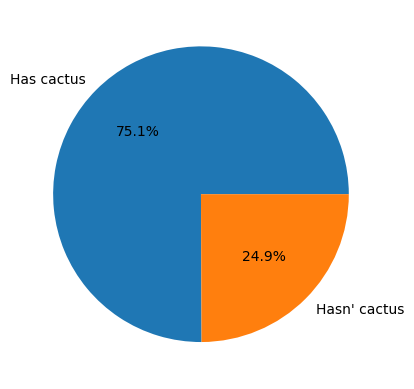

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['has_cactus'].value_counts(),
        labels=['Has cactus', 'Hasn\' cactus'],
        autopct = '%.1f%%')
plt.show()

In [ ]:
!unzip /content/data/train.zip -d train
!unzip /content/data/test.zip -d test

In [14]:
from glob import glob

In [22]:
train_path = glob('/content/train/train/*.jpg')
test_path = glob('/content/test/test/*.jpg')

In [23]:
len(train_path), len(test_path)

(17500, 4000)

In [24]:
train_path[:5]

['/content/train/train/77bd97e49a1fc7595a0fab5390ab51aa.jpg',
 '/content/train/train/951cb197c71c5ce971e0a1a9bdd8ae24.jpg',
 '/content/train/train/d08ee9c8747376a3e8ee65e3a04d1ed6.jpg',
 '/content/train/train/aa1fe205820a8fb5e10c37856fe80da6.jpg',
 '/content/train/train/a1ca0314465bcba8a5497220ea495915.jpg']

In [ ]:
ten_has_cactus_fname = df[df['has_cactus'] == 1]['id'][:10].values
ten_has_cactus_fname = "/content/train/train/" + ten_has_cactus_fname
ten_has_cactus_fname

In [36]:
from PIL import Image

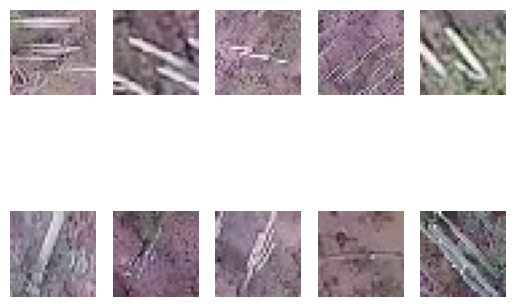

In [38]:
for idx,fname in  enumerate(ten_has_cactus_fname):
  plt.subplot(2,5,idx+1)
  img = Image.open(fname)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [43]:
import numpy as np


In [45]:
img = Image.open(ten_has_cactus_fname[0])
np.array(img).shape

(32, 32, 3)

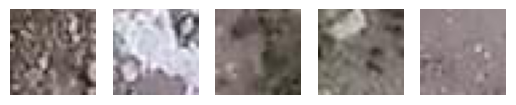

In [47]:
five_cactus_fname = df[df['has_cactus'] == 0]['id'][:5].values
five_cactus_fname = "/content/train/train/" + five_cactus_fname
for idx,fname in  enumerate(five_cactus_fname):
  plt.subplot(1,5,idx+1)
  img = Image.open(fname)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [48]:
import torch # 파이토치
import random
import numpy as np
import os

# 시드값 고정
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)                # 파이썬 난수 생성기 시드 고정
np.random.seed(seed)             # 넘파이 난수 생성기 시드 고정
torch.manual_seed(seed)          # 파이토치 난수 생성기 시드 고정 (CPU 사용 시)
torch.cuda.manual_seed(seed)     # 파이토치 난수 생성기 시드 고정 (GPU 사용 시)
torch.cuda.manual_seed_all(seed) # 파이토치 난수 생성기 시드 고정 (멀티GPU 사용 시)
torch.backends.cudnn.deterministic = True # 확정적 연산 사용
torch.backends.cudnn.benchmark = False    # 벤치마크 기능 해제
torch.backends.cudnn.enabled = False      # cudnn 사용 해제

In [49]:
device ='cuda' if torch.cuda.is_available() else 'cpu'

In [50]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
train, valid = train_test_split(df,
                                test_size=0.1,
                                stratify=df['has_cactus'],
                                random_state=50)

In [57]:
train

,id,has_cactus
10630,995e3ba502e55d8e469b0b4623893176.jpg,0
8638,7bc5c0e2a681b1f173c70899534dca7a.jpg,1
11167,a148ba511648e3975f0cf5e6b8bc5593.jpg,1
2398,21650f4673340621f3d508f8dee60059.jpg,0
17110,fa4411b08a8efff184ad4e71abbac8a5.jpg,1
...,...,...
11006,9f22014ea131cca0b31cf396dd3a5936.jpg,0
13085,be05fe5498e5647b517258bc9bbc29a5.jpg,1
15963,e8db543e91815bc2906f1853b01f8d84.jpg,1
9368,870d086ffb1027403f8a72e21a14fb68.jpg,1


In [54]:
len(df)

17500

In [56]:
import cv2 # OpenCV 라이브러리
from torch.utils.data import Dataset # 데이터 생성을 위한 클래스

class ImageDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__() # 상속받은 Dataset의 생성자 호출
        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)

    # 인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]    # 이미지 ID
        img_path = self.img_dir + img_id # 이미지 파일 경로
        image = cv2.imread(img_path)     # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        label = self.df.iloc[idx, 1]     # 이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 변환기가 있다면 이미지 변환
        return image, label

In [58]:
from torchvision import transforms # 이미지 변환을 위한 모듈
transform = transforms.ToTensor()
dataset_train = ImageDataset(df=train, img_dir='/content/train/train/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir='/content/train/train/', transform=transform)

In [66]:
from torch.utils.data import DataLoader # 데이터 로더 클래스

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

In [67]:
# next(iter(loader_train))

In [70]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주 사용되는 함수

class Model(nn.Module):
    # 신경망 계층 정의
    def __init__(self):
        super(Model,self).__init__() # 상속받은 nn.Module의 __init__() 메서드 호출

        # 첫 번째 합성곱 계층
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32,
                               kernel_size=3, padding=2)
        # 두 번째 합성곱 계층
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64,
                               kernel_size=3, padding=2)
        # 최대 풀링 계층
        self.max_pool = nn.MaxPool2d(kernel_size=2)
        # 평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size=2)
        # 전결합 계층
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)

    # 순전파 출력 정의
    def forward(self, x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        # x = x.view(-1, 64 * 4 * 4) # 평탄화
        x = nn.Flatten()(x)
        x = self.fc(x)
        return x

In [71]:
model = Model().to(device)

model

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

In [72]:
# 손실함수
criterion = nn.CrossEntropyLoss()

In [73]:
# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [75]:
import tqdm
epochs = 10 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):

    # '반복 횟수'만큼 반복
    iterdata = tqdm.tqdm(loader_train)
    for images, labels in iterdata:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)

        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 역전파 수행
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        # 훈련 데이터 손실값 출력
        iterdata.set_description(f'에폭 [{epoch+1}] - 손실값: {loss.item()}')


에폭 [10] - 손실값: 0.03094567358493805: 100%|██████████| 493/493 [00:34<00:00, 14.34it/s]


성능검증

In [80]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수 임포트

# 실제값과 예측 확률값을 담을 리스트 초기화
true_list = []
preds_list = []

model.eval() # 모델을 평가 상태로 설정

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)

        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # print(outputs, outputs.shape,torch.softmax(outputs.cpu(), dim=1))
        # break
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측 확률

        true = labels.cpu() # 실제값
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)

# 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

검증 데이터 ROC AUC : 0.9906


ROC
  - 분류모델의 성능을 시각화
  - 진짜양성비율에 대한 거짓양성 비율의 곡선

성능개선
  - 다양한 이미지를확보 : 이미지 증폭
  - 모델을 좀더 깊게 : 배치정규화
  - 성능좋은 옵티마이져 : 최신옵티마이져
  - 훈련수 증가

이미지 증폭

In [82]:
import torchvision.transforms as tf
transform_train = tf.Compose([
    tf.ToTensor(), tf.Pad(32,padding_mode='symmetric'),
    tf.RandomHorizontalFlip(),
    tf.RandomVerticalFlip(),
    tf.RandomRotation(10),
    tf.Normalize(mean=(0.4,0.4,0.4), std=(0.2,0.2,0.2))
])
transform_test = tf.Compose([
    tf.ToTensor(), tf.Pad(32,padding_mode='symmetric'),
    tf.Normalize(mean=(0.4,0.4,0.4), std=(0.2,0.2,0.2))
])

이미지 데이터셋

In [83]:
dataset_train = ImageDataset(df=train, img_dir='/content/train/train/', transform=transform_train)
dataset_valid = ImageDataset(df=valid, img_dir='/content/train/train/', transform=transform_test)

데이터 로더

In [84]:
loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

모델생성
  - basicModel
    - 합성곱+배치정규화+최대폴링

basicModel x 5 + 평균폴링 + 평탄화 + FC + FC -output
  

In [122]:
# (입력데이터의크기 + 2*패딩-커널사이즈) / 스트라이드 사이즈 + 1
class NewModel(nn.Module):
  def __init__(self, ) -> None:
      super(NewModel,self).__init__()
      self.block1 = nn.Sequential(
          nn.Conv2d(3,32,kernel_size=3,padding=2),
          nn.BatchNorm2d(32),
          nn.LeakyReLU(),
          nn.MaxPool2d(2)
      )
      self.block2 = nn.Sequential(
          nn.Conv2d(32,64,kernel_size=3,padding=2),
          nn.BatchNorm2d(64),
          nn.LeakyReLU(),
          nn.MaxPool2d(2)
      )
      self.block3 = nn.Sequential(
          nn.Conv2d(64,128,kernel_size=3,padding=2),
          nn.BatchNorm2d(128),
          nn.LeakyReLU(),
          nn.MaxPool2d(2)
      )
      self.block4 = nn.Sequential(
          nn.Conv2d(128,256,kernel_size=3,padding=2),
          nn.BatchNorm2d(256),
          nn.LeakyReLU(),
          nn.MaxPool2d(2)
      )
      self.block5 = nn.Sequential(
          nn.Conv2d(256,512,kernel_size=3,padding=2),
          nn.BatchNorm2d(512),
          nn.LeakyReLU(),
          nn.MaxPool2d(2)
      )
      self.avg_pool = nn.AvgPool2d(kernel_size=4)
      self.flatten = nn.Flatten()
      self.fc1 = nn.Linear(in_features=512, out_features=64)
      self.fc2 = nn.Linear(in_features=64, out_features=2)
  def forward(self, x):
    x = self.block1(x);     x = self.block2(x);     x = self.block3(x)
    x = self.block4(x);    x = self.block5(x)
    x = self.avg_pool(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

model = NewModel().to(device)

손실함수

In [123]:
criterion = nn.CrossEntropyLoss()

옵티마이져

In [124]:
optimizer = torch.optim.Adamax(model.parameters(),lr=6e-6)

학습

In [125]:
# for images, _ in loader_train:
#   images = images.to(device)
#   print(images.shape)
#   break


In [ ]:
import tqdm
epochs = 100 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):

    # '반복 횟수'만큼 반복
    iterdata = tqdm.tqdm(loader_train)
    for images, labels in iterdata:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)

        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 역전파 수행
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        # 훈련 데이터 손실값 출력
        iterdata.set_description(f'에폭 [{epoch+1}] - 손실값: {loss.item()}')


에폭 [1] - 손실값: 0.287889689207077:  18%|█▊        | 90/493 [02:21<09:51,  1.47s/it]  